<a href="https://colab.research.google.com/github/profRCC/Softex/blob/master/RedesNeurais_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predição de campanha de marketing bancário**

* Dados de campanha de marketing de uma instituição bancária de Portugal
* Ligações são feitas para os clientes
* Objetivo é predizer se o usuário irá aceitar o produto oferecido
* 45211 instâncias (usando apenas 15000)
* 16 atributos
* [Bank Marketing](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

## Simulação de pipeline real
* Dividi o dataset em duas partes
  * bank_modeling simula o dataset no momento da modelagem
  * bank_real simula os dados quando o modelo está em produção
* Tamanho dos datasets
  * bank_modeling com 10000 instâncias
  * bank_real com 5000 instâncias

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 1. Importar bibliotecas necessárias

In [3]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Lendo dados

In [4]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Softex/Semana3/datasets/marketing/bank.csv')

## 3. Limpeza e organização dos dados

In [5]:
#removendo colunas não informativas
dados = dados.drop(columns=['contact','day','month'])
dados.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,no


### Transformando atributos categóricos em numéricos

In [6]:
# transformando todos os valores categóricos em numéricos de uma única vez
dados.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
#valores possíveis para o atributo job
jobs = sorted(dados.job.unique())
jobs

['admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown']

In [8]:
# associando cada valor categórico a um valor numérico
jobs_num = [i for i in range(len(jobs))]
jobs_num

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [9]:
# substituindo valores categóricos por numéricos
dados['job'] = dados['job'].replace(jobs,jobs_num)
dados.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,4,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,9,single,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,1,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,11,single,unknown,no,1,no,no,198,1,-1,0,unknown,no


In [10]:
#verificando valores para o atributo marital
estado_civil = sorted(dados.marital.unique())
estado_civil

['divorced', 'married', 'single']

In [11]:
# substituind valores categóricos por valores
dados.marital = dados.marital.replace(['single', 'married','divorced'],[0,1,2])
dados.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,9,0,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,2,1,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,1,1,unknown,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,11,0,unknown,no,1,no,no,198,1,-1,0,unknown,no


In [12]:
educacao = sorted(dados.education.unique())
educacao

['primary', 'secondary', 'tertiary', 'unknown']

In [13]:
dados.education = dados.education.replace(['unknown','primary', 'secondary', 'tertiary'],[0,1,2,3])

In [14]:
default = sorted(dados.default.unique())
default

['no', 'yes']

In [15]:
dados.default = dados.default.replace(['no', 'yes'],[0,1])

In [16]:
housing = sorted(dados.housing.unique())
housing

['no', 'yes']

In [17]:
dados.housing = dados.housing.replace(['no', 'yes'],[0,1])

In [18]:
loan = sorted(dados.loan.unique())
loan

['no', 'yes']

In [19]:
dados.loan = dados.loan.replace(['no', 'yes'],[0,1])

In [21]:
poutcome = dados.poutcome.unique()
poutcome

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [23]:
dados.poutcome = dados.poutcome.replace(['unknown','other', 'failure', 'success'],[0,1,2,3])

In [30]:
dados.y = dados.y.replace(['no','yes'],[0,1])

In [31]:
dados.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,3,0,2143,1,0,261,1,-1,0,0,0
1,44,9,0,2,0,29,1,0,151,1,-1,0,0,0
2,33,2,1,2,0,2,1,1,76,1,-1,0,0,0
3,47,1,1,0,0,1506,1,0,92,1,-1,0,0,0
4,33,11,0,0,0,1,0,0,198,1,-1,0,0,0


## 4. Análise Preliminar dos Dados



In [33]:
aceitou = dados[dados_modelagem.y==1]
nao_aceitou = dados[dados_modelagem.y==0]

In [34]:
#contagem das classes
aceitou.shape[0]

1376

In [35]:
nao_aceitou.shape[0]

8624

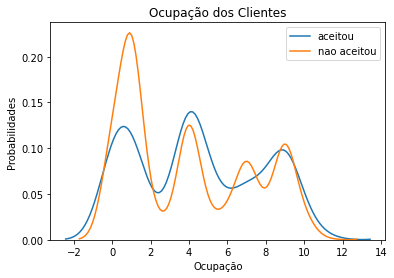

In [36]:
# distribuição de probabilidade comparando job para as duas classes
sns.distplot(aceitou.job, hist=False, rug=False,label='aceitou')
sns.distplot(nao_aceitou.job, hist=False, rug=False,label='nao aceitou')
plt.xlabel('Ocupação')
plt.ylabel('Probabilidades')
plt.title('Ocupação dos Clientes')
plt.show()

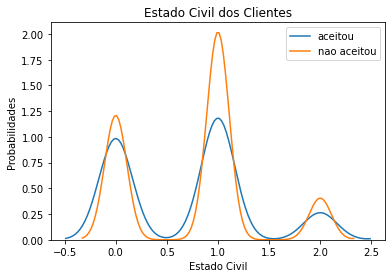

In [37]:
# distribuição de probabilidade comparando estado civil para as duas classes
sns.distplot(aceitou.marital, hist=False, rug=False,label='aceitou')
sns.distplot(nao_aceitou.marital, hist=False, rug=False,label='nao aceitou')
plt.xlabel('Estado Civil')
plt.ylabel('Probabilidades')
plt.title('Estado Civil dos Clientes')
plt.show()

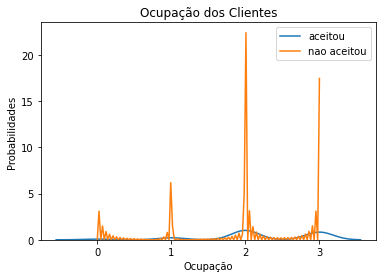

In [38]:
# distribuição de probabilidade comparando nível educacional para as duas classes
sns.distplot(aceitou.education, hist=False, rug=False,label='aceitou')
sns.distplot(nao_aceitou.education, hist=False, rug=False,label='nao aceitou')
plt.xlabel('Nível de Educação')
plt.ylabel('Probabilidades')
plt.title('Nível de Educação dos Clientes')
plt.show()

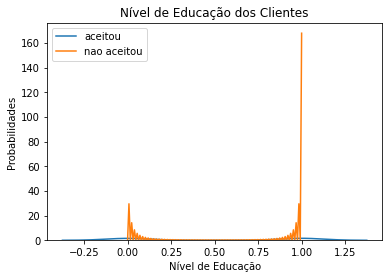

In [39]:
# distribuição de probabilidade comparando nível educacional para as duas classes
sns.distplot(aceitou.housing, hist=False, rug=False,label='aceitou')
sns.distplot(nao_aceitou.housing, hist=False, rug=False,label='nao aceitou')
plt.xlabel('Nível de Educação')
plt.ylabel('Probabilidades')
plt.title('Nível de Educação dos Clientes')
plt.show()

In [41]:
corr = dados.corr()
corr

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,0.403240,-0.173615,-0.017879,0.097783,-0.185513,-0.015655,-0.004648,0.004760,-0.023758,0.001288,0.014363,0.025155
job,-0.021868,1.000000,-0.062045,0.135898,-0.006853,0.018232,-0.125363,-0.033004,0.004744,0.006839,-0.024455,-0.000911,0.005514,0.040438
marital,0.403240,-0.062045,1.000000,-0.095415,0.007023,-0.002122,0.016096,0.046893,-0.011852,0.008994,-0.019172,-0.014973,-0.024731,-0.045588
education,-0.173615,0.135898,-0.095415,1.000000,-0.009035,0.050572,-0.038689,0.004307,0.002554,0.000194,0.007092,0.025295,0.041036,0.051341
default,-0.017879,-0.006853,0.007023,-0.009035,1.000000,-0.066745,-0.006025,0.077234,-0.010021,0.016822,-0.029979,-0.018329,-0.039593,-0.022419
balance,0.097783,0.018232,-0.002122,0.050572,-0.066745,1.000000,-0.068768,-0.084350,0.021560,-0.014578,0.003435,0.016674,0.034865,0.052838
housing,-0.185513,-0.125363,0.016096,-0.038689,-0.006025,-0.068768,1.000000,0.041323,0.005075,-0.023599,0.124178,0.037076,0.031062,-0.139173
loan,-0.015655,-0.033004,0.046893,0.004307,0.077234,-0.084350,0.041323,1.000000,-0.012412,0.009980,-0.022754,-0.011043,-0.039928,-0.068185
duration,-0.004648,0.004744,-0.011852,0.002554,-0.010021,0.021560,0.005075,-0.012412,1.000000,-0.084570,-0.001565,0.001203,0.013304,0.394521
campaign,0.004760,0.006839,0.008994,0.000194,0.016822,-0.014578,-0.023599,0.009980,-0.084570,1.000000,-0.088628,-0.032855,-0.111592,-0.073172


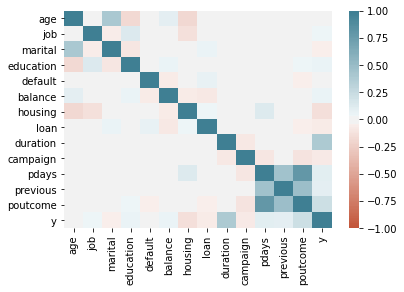

In [42]:
#plotando coeficientes de correlação em um mapa de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

##4. Re-escala dos dados 

In [43]:
dados = (dados - dados.min())/(dados.max()-dados.min())

### Dividindo os dados em dados para modelagem e dados para simulação real

In [44]:
dados_modelagem = dados[30000:40000]
dados_reais = dados[40001:45000]

## 5. Organização dos dados para modelagem

In [45]:
#dividindo dados em atributos descritores e atributo de classe
X = dados_modelagem.iloc[:,:-1]
X.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
30000,0.285714,0.636364,0.0,0.666667,0.0,0.110263,0.0,0.0,0.136438,0.016129,0.000000,0.000000,0.000000
30001,0.259740,0.909091,0.5,1.000000,0.0,0.074628,0.0,0.0,0.042497,0.000000,0.000000,0.000000,0.000000
30002,0.181818,0.363636,0.5,1.000000,0.0,0.098705,1.0,1.0,0.085197,0.000000,0.000000,0.000000,0.000000
30003,0.272727,0.909091,0.5,0.666667,0.0,0.084688,1.0,0.0,0.119357,0.016129,0.000000,0.000000,0.000000
30004,0.363636,0.090909,0.0,0.666667,0.0,0.076199,0.0,1.0,0.004677,0.064516,0.009174,0.007273,0.333333


In [46]:
y = dados_modelagem.y
y.head()

30000    0.0
30001    0.0
30002    0.0
30003    0.0
30004    0.0
Name: y, dtype: float64

## 6. Modelagem com Grid Search

In [47]:
param_grid = [
              {
                  'hidden_layer_sizes': [(10),(50),(100)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['adam'],
                  'max_iter': [1000]
              }
              
]

In [48]:
classificador = GridSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [49]:
classificador.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [50]:
print(classificador.best_params_)

{'activation': 'identity', 'hidden_layer_sizes': 100, 'max_iter': 1000, 'solver': 'adam'}


In [51]:
print(classificador.best_score_)

0.8699


## 7. Predição nos dados reais

In [53]:
#quantidade de instâncias da classe 0
dados_reais[dados_reais.y==0].shape[0]

2707

In [54]:
#quantidade de instâncias da classe 1
dados_reais[dados_reais.y==1].shape[0]

2292

In [55]:
X_real = dados_reais.iloc[:,:-1]
y_real = dados_reais.y

In [56]:
mlp = classificador.best_estimator_

In [57]:
classificao = mlp.predict(X_real)

In [59]:
acuracia = accuracy_score(y_real,classificao)
acuracia

0.611122224444889

In [60]:
precisao = precision_score(y_real,classificao)
precisao

0.6959459459459459

In [61]:
recall = recall_score(y_real,classificao)
recall

0.2696335078534031

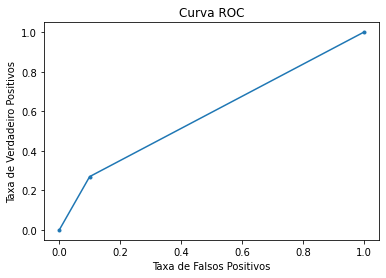

In [62]:
fpr, tpr, _ = roc_curve(y_real,classificao)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()